# Clustering 

## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

Expecting a plot of `epsilon` vs `sil_score`.

In [1]:
# Import Needed Packages
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt


dbscan = DBSCAN(eps=.12)

# Import Road Data
import pandas as pd
roads = pd.read_csv('../data/3D_spatial_network.txt.gz', header=None, names=['osm', 'lat','lon','alt'])
roads = roads.drop(['osm'], axis=1).sample(10000)
roads.head()

# Setup Lists
min_samples = range(1, 11)
epsilons = np.arange(0.05, 0.51, 0.01)

In [2]:
min_samples
epsilons

array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15,
       0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26,
       0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37,
       0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48,
       0.49, 0.5 ])

In [3]:
########################################
all_scores = []
for min_sample in min_samples:
    scores = []
    for epsilon in epsilons:
        
        dbscan = DBSCAN(eps=epsilon)
        roads['cluster'] = dbscan.fit_predict(roads[['lat','lon', 'alt']])
        km = KMeans(n_clusters=min_sample, random_state=123)

        # calculate silouette score here
        score = metrics.silhouette_score(roads[['lon', 'lat', 'alt']], roads['cluster'])
        
        scores.append(score)
        
    all_scores.append(scores)

In [4]:
mins_combo = []
epsilons_combo = []
for min_sample in min_samples:
    for epsilon in epsilons:
        mins_combo_iteration = min_sample
        epsilons_combo_iteration = epsilon
        mins_combo.append(mins_combo_iteration)
        epsilons_combo.append(epsilons_combo_iteration)

In [5]:
# Need to Flatten List
import itertools
all_scores_flattened = list(itertools.chain.from_iterable(all_scores))

In [6]:
# Check Lengths Match 
(
len(all_scores_flattened),
len(mins_combo),
len(epsilons_combo)
    )


(460, 460, 460)

In [7]:
scores_min_epsilons = np.array([all_scores_flattened,mins_combo,epsilons_combo])
scores_min_epsilons.shape
scores_min_epsilons

array([[-0.68659636, -0.70049173, -0.68915341, ..., -0.49711774,
        -0.49694127, -0.49858941],
       [ 1.        ,  1.        ,  1.        , ..., 10.        ,
        10.        , 10.        ],
       [ 0.05      ,  0.06      ,  0.07      , ...,  0.48      ,
         0.49      ,  0.5       ]])

In [8]:
silcoeff = pd.DataFrame(scores_min_epsilons)
silcoeff = silcoeff.transpose()
silcoeff = silcoeff.rename(columns={0: 'Scores', 1: 'Min_Samples', 2: 'Epsilons'})
silcoeff


,Scores,Min_Samples,Epsilons
0,-0.686596,1.0,0.05
1,-0.700492,1.0,0.06
2,-0.689153,1.0,0.07
3,-0.719220,1.0,0.08
4,-0.739934,1.0,0.09
...,...,...,...
455,-0.505138,10.0,0.46
456,-0.483256,10.0,0.47
457,-0.497118,10.0,0.48
458,-0.496941,10.0,0.49


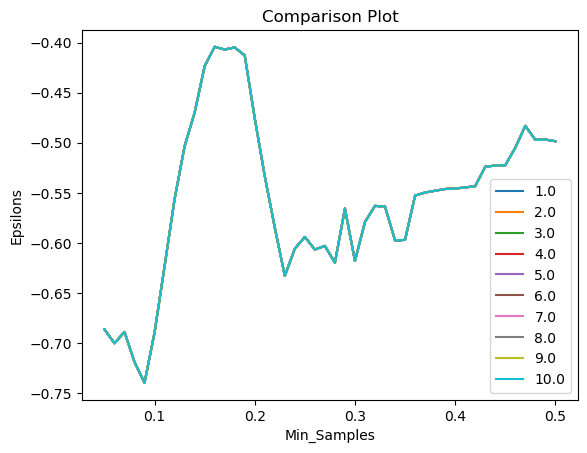

In [9]:
# Groups
silcoeff_groups = silcoeff.groupby('Min_Samples')
silcoeff
# Create a new figure
fig, ax = plt.subplots()

# Generate lines for each group
for group_name, group_data in silcoeff_groups:
    ax.plot(group_data['Epsilons'], group_data['Scores'], label=group_name)
    
ax.set_xlabel('Min_Samples')
ax.set_ylabel('Epsilons')
ax.set_title('Comparison Plot')
ax.legend()
plt.show()

In [10]:
filtered_silcoeff = silcoeff[silcoeff['Epsilons'] == .05]
# Only one line is visible as despite varying epsilon values, the resulting silhouette score are the same; 
# the result is that the ten lines overlap. This seems unusual but I cannot find what is causing the lines to return the same.

## 2. Clustering your own data

Using your own data, find relevant clusters/groups within your data (repeat the above). If your data is labeled with a class that you are attempting to predict, be sure to not use it in training and clustering. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D or 3D plots. 

As a bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot (like in 1.)
- Plots of the clustered data

In [11]:
# Reading In Resume Data
# Source: 'https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata'
movies_base = pd.read_csv("../data/tmdb_5000_movies.csv") 
movies_lean = movies_base[['popularity', 'revenue', 'runtime','vote_average','vote_count']]
movies_lean

,popularity,revenue,runtime,vote_average,vote_count
0,150.437577,2787965087,162.0,7.2,11800
1,139.082615,961000000,169.0,6.9,4500
2,107.376788,880674609,148.0,6.3,4466
3,112.312950,1084939099,165.0,7.6,9106
4,43.926995,284139100,132.0,6.1,2124
...,...,...,...,...,...
4798,14.269792,2040920,81.0,6.6,238
4799,0.642552,0,85.0,5.9,5
4800,1.444476,0,120.0,7.0,6
4801,0.857008,0,98.0,5.7,7


In [13]:
movies_lean = movies_lean.dropna(axis=1)
movies_no_NaN = movies_lean.dropna(axis=1)
len(movies_no_NaN)

4803

In [14]:
# Setup Lists
movies_min_samples = range(1, 11)
movies_epsilons = np.arange(0.05, 0.51, 0.05)
(movies_min_samples,movies_epsilons)

(range(1, 11),
 array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ]))

In [15]:
########################################
all_movie_scores = []
for min_sample in movies_min_samples:
    movie_scores = []
    for epsilon in movies_epsilons:
        
        dbscan = DBSCAN(eps=epsilon)
        movies_lean.cluster = dbscan.fit_predict(movies_lean)
        km = KMeans(n_clusters=movies_min_samples, random_state=123)

        # calculate silouette score here
        movie_score = metrics.silhouette_score(movies_lean, movies_lean.cluster)
        
        movie_scores.append(movie_score)
        
    all_movie_scores.append(movie_scores)

C:\Users\Brett\AppData\Local\Temp\ipykernel_9116\2493852444.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  movies_lean.cluster = dbscan.fit_predict(movies_lean)


In [16]:
all_movie_scores_flattened = list(itertools.chain.from_iterable(all_movie_scores))
# all_movie_scores_flattened

In [17]:
movie_mins_combo = []
movie_epsilons_combo = []
for min_sample in movies_min_samples:
    for epsilon in movies_epsilons:
        mins_combo_iteration = min_sample
        epsilons_combo_iteration = epsilon
        movie_mins_combo.append(mins_combo_iteration)
        movie_epsilons_combo.append(epsilons_combo_iteration)

In [18]:
(
len(all_movie_scores_flattened),
len(movie_mins_combo),
len(movie_epsilons_combo)
)

(100, 100, 100)

In [19]:
# Using Silhouette To Show Performance
movie_scores_min_epsilons = np.array([all_movie_scores_flattened,movie_mins_combo,movie_epsilons_combo])
movie_scores_min_epsilons.shape
# movie_scores_min_epsilons
movie_silcoeff = pd.DataFrame(scores_min_epsilons)
movie_silcoeff = silcoeff.transpose()
movie_silcoeff = silcoeff.rename(columns={0: 'Scores', 1: 'Min_Samples', 2: 'Epsilons'})
movie_silcoeff

,Scores,Min_Samples,Epsilons
0,-0.686596,1.0,0.05
1,-0.700492,1.0,0.06
2,-0.689153,1.0,0.07
3,-0.719220,1.0,0.08
4,-0.739934,1.0,0.09
...,...,...,...
455,-0.505138,10.0,0.46
456,-0.483256,10.0,0.47
457,-0.497118,10.0,0.48
458,-0.496941,10.0,0.49


In [20]:
movie_silcoeff_sorted = movie_silcoeff.sort_values(by='Scores')
movie_silcoeff_sorted

,Scores,Min_Samples,Epsilons
418,-0.739934,10.0,0.09
234,-0.739934,6.0,0.09
4,-0.739934,1.0,0.09
96,-0.739934,3.0,0.09
372,-0.739934,9.0,0.09
...,...,...,...
149,-0.404238,4.0,0.16
11,-0.404238,1.0,0.16
103,-0.404238,3.0,0.16
379,-0.404238,9.0,0.16


In [21]:
# Optimal Fit: Samples of 6, epsilon value of .4

Text(0, 0.5, 'Vote Count')

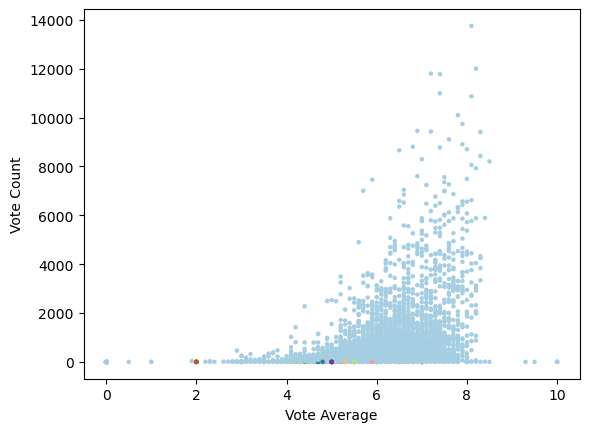

In [22]:
# 2D Plot
        
two_dplot_dbscan = DBSCAN(eps=.4)
movies_lean.cluster = two_dplot_dbscan.fit_predict(movies_lean)
two_dplot_km = KMeans(n_clusters=6, random_state=123)

plt.scatter(movies_lean['vote_average'],movies_lean['vote_count'], c=movies_lean.cluster, s=5, cmap='Paired')
plt.xlabel('Vote Average')
plt.ylabel('Vote Count')

In [ ]:
# While these settings were the best option/highest silhouette score for the presented items, it is obvious that the results
# generated one large cluster and a set of very small (1 movie) clusters. For future iterations I will improve by training on
# other features that may more accurately highlight the diversity of the movies presented. 